# The Sparks Foundation

# Data Science & Business Analytics Internship

# Author: Somnath Ingole

# Task 1: Prediction using supervised machine learning

**In this task, we are going to predict the percentage of marks that a student is expected to score based upon the number of hours he has studied. So this simple linear regression based task using one dependent and independent variable. In this case we have percentage marks as a dependent variable and study hours is as a independent variable. So let's get start...

# Import all the required libraries:

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

# Import the Dataset:

In [2]:
url = "http://bit.ly/w-data"  ##reading data from url

In [3]:
df = pd.read_csv(url)

In [4]:
print("Data imported successfully")

Data imported successfully


# Analysis of Dataset:

In [5]:
df.shape   ##number of rows and columns in dataset

(25, 2)

In [6]:
df.describe()  ## shows descriptive stats of dataset

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.head()  ##showing first five rows 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
df.tail()   ##shows last five rows

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [9]:
df.isnull().sum()  ##checking to is there any null value in dataset?

Hours     0
Scores    0
dtype: int64

In [10]:
df.corr()  ##shows paisre wise correlation 

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Visualization of Dataset:

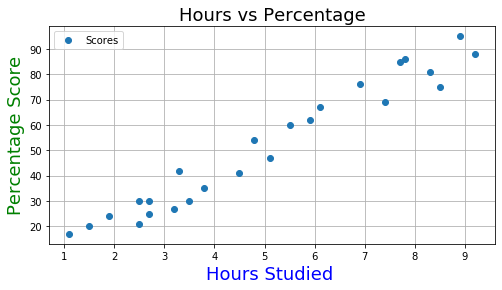

In [11]:
df.plot(x='Hours', y='Scores', style='o', figsize=(8, 4))  ##plotting the distribution of scores
plt.title('Hours vs Percentage',color="black", size=18)      
plt.xlabel('Hours Studied ', color="blue",size=18)                    
plt.ylabel('Percentage Score', color="green",size=18)
plt.grid(True)
plt.show()

# From the graph above, we can cleraly see that as number of hours are increasing, percentage score is also increasing it means that there is a positive relationship between the number of hours studied and percentage of score because

# Prepration of the Data:

**In this step, we are going to split the data into "attributes"(inputs) and "labels"(outputs).

In [12]:
x = df.iloc[:, :-1].values    
y = df.iloc[:, 1].values

**After attaching the attributes, next step is to split the data into two parts: one is testing set and another is training set. In jupyter notebook we can do this by using the Scikit-learns built-in train_test_split()method.

In [13]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0)

**After successfully splitting the data in to two parts, we can train the model.

# Model Training:

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 
print("Model training is complete!")

Model training is complete!


# Plotting the Regression line for Test Data:

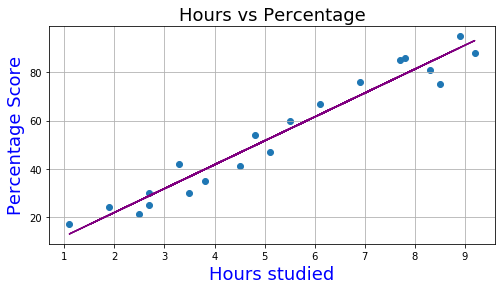

In [16]:
 line = regressor.coef_*x+regressor.intercept_      ##plotting the regression line
plt.figure(figsize=(8, 4))
plt.scatter(x_train, y_train)
plt.plot(x, line, color="purple")
plt.title('Hours vs Percentage',color="black", size=18)
plt.xlabel('Hours studied', color="blue", size=18)
plt.ylabel('Percentage Score', color="blue", size=18)
plt.grid(True)
plt.show()

# Making Predictions:

**Well, we have trained our model successfully, now let's do seome predictions...

In [17]:
print(x_test)  ##testing the data in Hours
y_pred = regressor.predict(x_test)  ##predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


# Comparison between actual and predicted values:


In [18]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  ##comparing Actual vs Predicted values
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [19]:
print("Training Score: ",regressor.score(x_train, y_train))  ##checking the performance of model
print("Testing Score: ",regressor.score(x_test, y_test))

Training Score:  0.9515510725211553
Testing Score:  0.9454906892105356


# Evalution of the model:

In [20]:
from sklearn import metrics 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


In [23]:
from sklearn.metrics import r2_score
print("R-2 Score: ",r2_score(y_test, y_pred))

R-2 Score:  0.9454906892105356


In [27]:
from sklearn.metrics import mean_absolute_error
print("mean Absolute Error:", mean_absolute_error(y_test, y_pred))

mean Absolute Error: 4.183859899002975
